In [436]:
''' 
#Base class
General Neuron:
   |      #Intermediate class
   |______Sensory Neuron:
   |            |    # leaves  
   |            |____Photoreceptor
   |            |____Mechanoreceptor
   |
   |      #Intermediate class
   |______Motor Neuron:
                |    # leaves
                |____Alpha Motor Neuron
                |____Gamma Motor Neuron
'''
# Additional diagram drawing - manual, in the next block

' \n#Base class\nGeneral Neuron:\n   |      #Intermediate class\n   |______Sensory Neuron:\n   |            |    # leaves  \n   |            |____Photoreceptor\n   |            |____Mechanoreceptor\n   |\n   |      #Intermediate class\n   |______Motor Neuron:\n                |    # leaves\n                |____Alpha Motor Neuron\n                |____Gamma Motor Neuron\n'

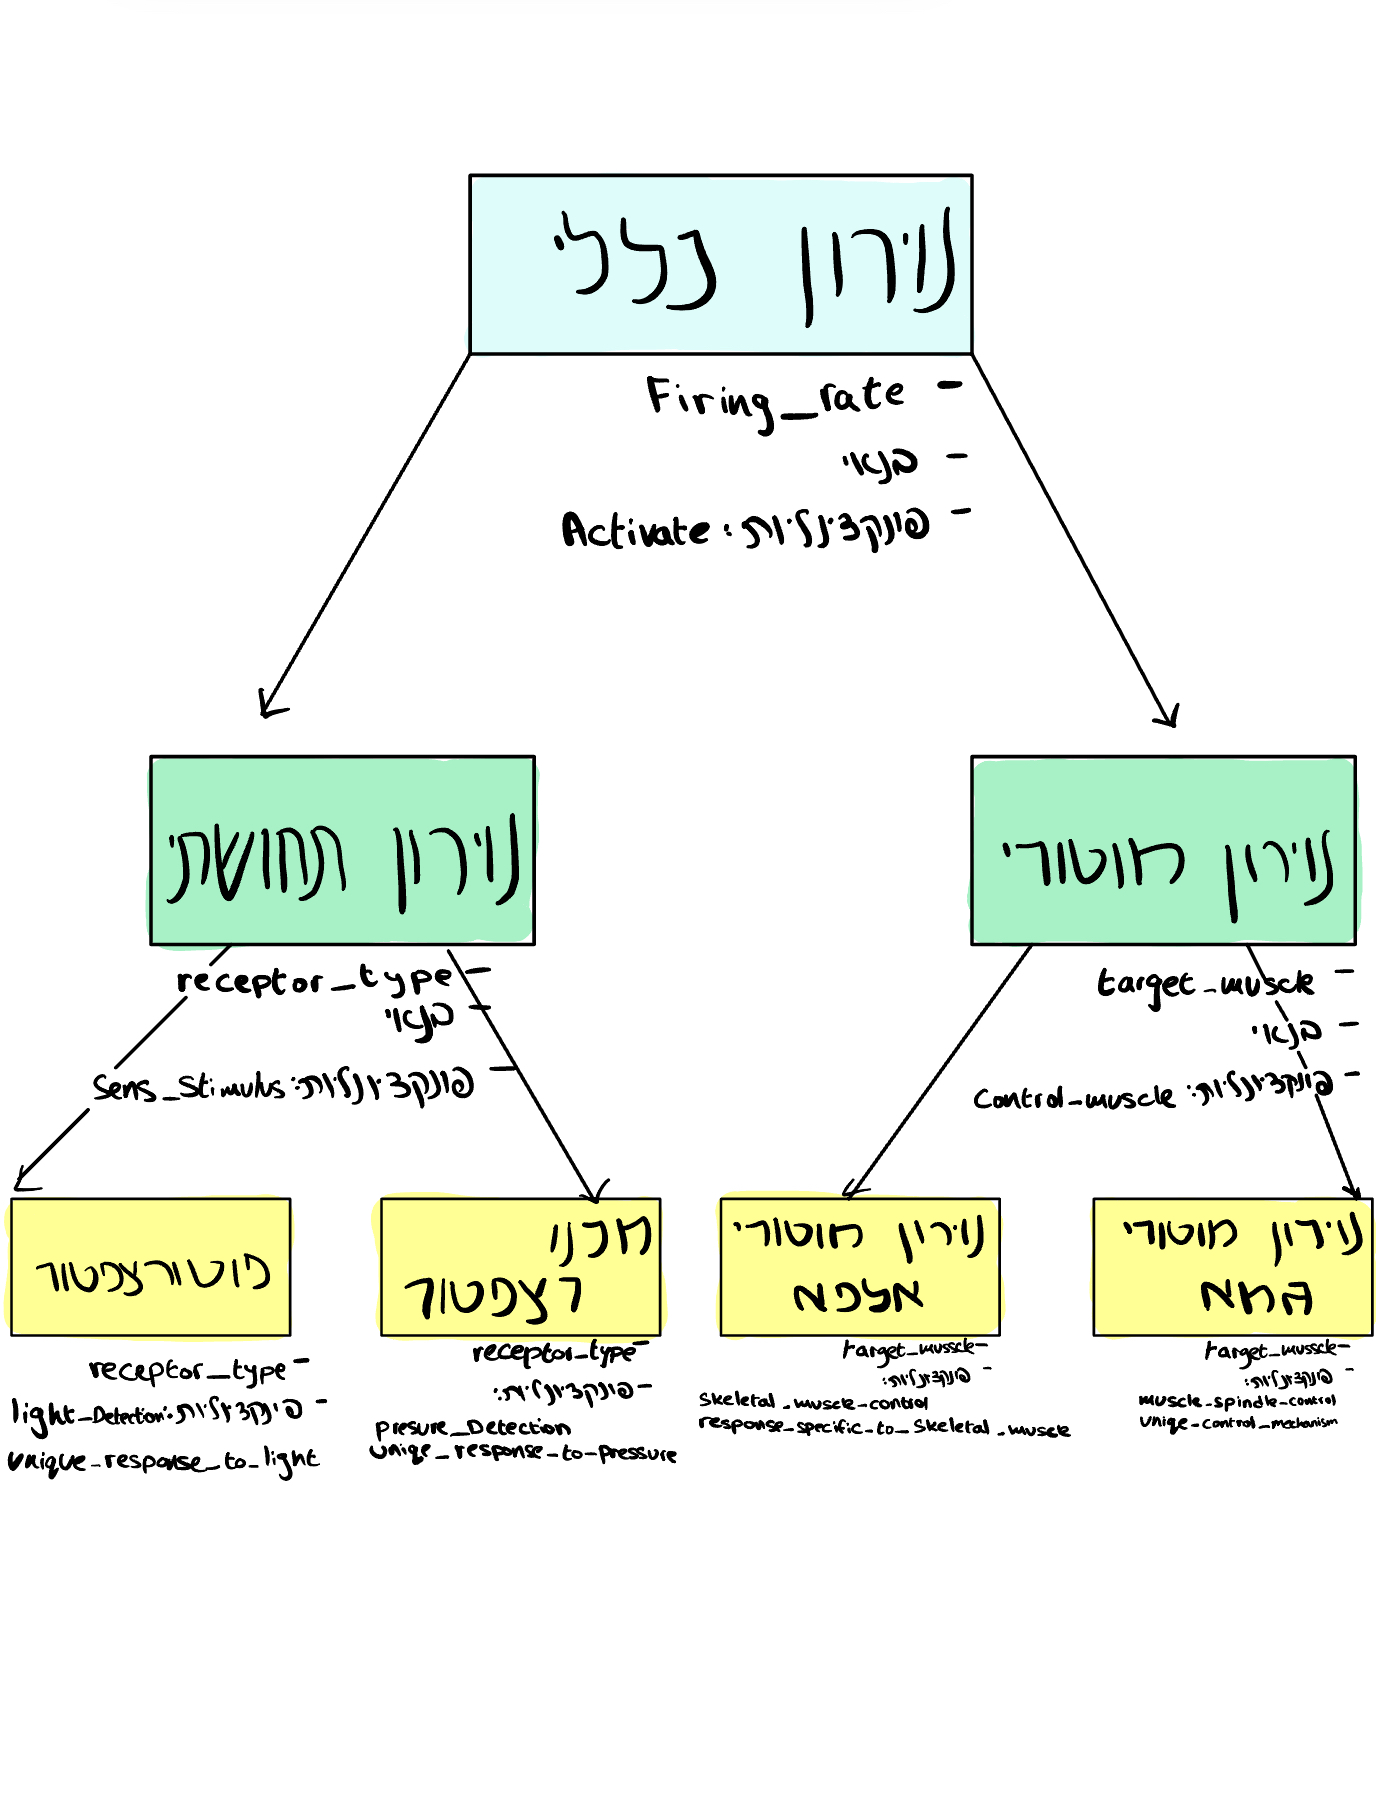

In [437]:
pip install numpy matplotlib panda

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [438]:
# A generic neuron with basic properties and functions common to all neuron types.
# BASE
class GeneralNeuron:
    # Constructor (with defualt value for firing_rate)
    def __init__(self, firing_rate=0.0):
        self.firing_rate = firing_rate

    # Calculates a firing rate based on the strength of that stimulus.
    def Activate(self, stimulus_strength):
        pass

# A neuron that detects and responds to external stimuli. Each sensory neuron is sensitive to a specific type of stimulus.
# INTERMEDIATE CLASS
class SensoryNeuron(GeneralNeuron):
    # Constructor
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

# Process the specific stimulus and activate the neuron
    def SenseStimulus(self, stimulus):
        stimulus_strength = stimulus.strength
        self.Activate(stimulus_strength)
        pass

# A neuron responsible for initiating muscle movement by sending activation signals to a target muscle.
# INTERMEDIATE CLASS
class MotorNeuron(GeneralNeuron):
    # Constructor
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    # Trigger a response in the target muscle
    def ControlMuscle(self):
        pass

# A sensory neuron specifically sensitive to light.
#LEAF
class Photoreceptor(SensoryNeuron):
    # Constructor
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="light")

    # Activate based on light intensity
    # override
    def SenseStimulus(self, light_intensity):
        self.Activate(stimulus_strength=light_intensity.strength)
        pass

# A sensory neuron that responds to pressure.
#LEAF
class Mechanoreceptor(SensoryNeuron):
    # Constructor
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="pressure")

    # Activate based on pressure level
    # override
    def SenseStimulus(self, pressure_intensity):
        self.Activate(stimulus_strength=pressure_intensity.strength)
        pass

# A motor neuron that controls skeletal muscles.
#LEAF
class AlphaMotorNeuron(MotorNeuron):
    # Constructor
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    # Initiate muscle contraction or movement
    # override
    def ControlMuscle(self, activation_level):
        self.target_muscle.move(activation_level)
        pass

# A motor neuron that controls muscle spindles, helping regulate muscle tone.
#LEAF
class GammaMotorNeuron(MotorNeuron):
    # Constructor
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="muscle spindle")

    # Adjust muscle spindle tension
    # override
    def ControlMuscle(self, activation_level):
        self.target_muscle.move(activation_level)
        pass

The length of the original array: 100
The length of the sampled array: 28


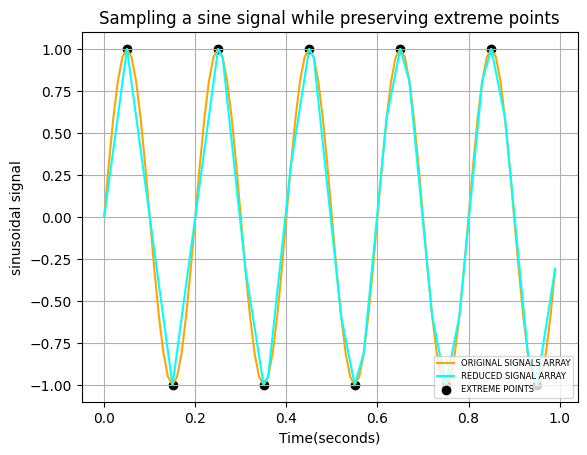

In [439]:
import numpy as np
import matplotlib.pyplot as plt

def calculateExtrime(arr: np.array):
    '''The np.diff function calculates the difference between adjacent values ​​in the array.
    I use this to calculate the rate of change (slope) between adjacent points in the signal.
    This helps me detect changes in direction (increase or decrease in the sine wave).'''
    slope = np.diff(arr)

    '''I use this logic to detect local maxima and minima:
    (slope[:-1] > 0) checks where the slope is positive (ascending) except for the last value.
    (slope[1:] < 0) checks where the slope is negative (descending) except for the first value.
    If the slope is positive and then becomes negative, this is a local maximum (peak).
    I use np.where to find the indices where the condition is true.
    The result is an index list, but since np.diff returns differences between adjacent values,
    the extreme points in the original array are always one step ahead. We add 1 to correct this.'''
    maxima = np.where((slope[:-1] > 0) & (slope[1:] < 0))[0] + 1

    minima = np.where((slope[:-1] < 0) & (slope[1:] > 0))[0] + 1

    # Return two values: the maxima values and minima values.
    return maxima, minima

def sinusoidalSignal(arr: np.array):
    # Set the number of steps to divide the signal by 5. This means I want to reduce the array by 20%.
    steps = 5 
    
    # Calculate the size of the sampled array by dividing the original array length by 'steps'.
    # Ensure that there is at least one value in the new array (using max to avoid zero division).
    size = max(len(arr) // steps, 1)

    # calculateExtreme function.
    maxima, minima = calculateExtrime(arr)
    
    '''I use np.linspace to create an array of evenly spaced points, ensuring 20% of the original points are selected.
    np.linspace returns float values by default, so I convert them to integers (dtype=int) for indexing the array.'''
    sampledPoint = np.linspace(0, len(arr) - 1, size, dtype=int)
    
    '''I use np.concatenate to combine the sampled points, maxima, and minima into a single array of indices.
    Then, np.unique ensures there are no duplicate indices by returning only unique values.'''
    all_indices = np.unique(np.concatenate((sampledPoint, maxima, minima)))
    
    # Return two values: the values in the original array at the indices I calculated, and the indices themselves.
    return arr[all_indices], all_indices

# Below is the code to verify the functionality of the implementation:

# Generate a time array from 0 to 1 second with a step size of 0.01 seconds (i.e., time is from 0 to 1, with 100 points).
time = np.arange(0, 1, 0.01)

# Set the frequency of the sinusoidal signal to 5 Hz (5 cycles per second).
frequency = 5  

# Create the array of sinusoidal signal using the sin function with the given frequency.
arr = np.sin(2 * np.pi * frequency * time)

# Call calculateExtreme function.
maxima, minima = calculateExtrime(arr)

# Call the function to downsample the sinusoidal signal.
sampleArr, sampleIndices = sinusoidalSignal(arr)

# Map the sampled indices to their corresponding time values.
newTime = time[sampleIndices]

# Print the length of the original array.
print("The length of the original array:", len(arr))

# Print the length of the sampled array.
print("The length of the sampled array:", len(sampleArr))

# Visualization:
# Plot the original signal in orange.
plt.plot(time, arr, label="ORIGINAL SIGNALS ARRAY", color='orange')

# Plot the downsampled signal in blue.
plt.plot(newTime, sampleArr, label="REDUCED SIGNAL ARRAY", color='cyan')

# Mark and scatter the local maxima (red points).
plt.scatter(time[maxima], arr[maxima], label="EXTREME POINTS", color='black',)

# Mark and scatter the local minima (red points).
plt.scatter(time[minima], arr[minima], color='black')

# Add a title and labels to the plot.
plt.title('Sampling a sine signal while preserving extreme points')
plt.xlabel('Time(seconds)')
plt.ylabel('sinusoidal signal')

# Display the legend in the lower right corner with a font size of 6.
plt.legend(loc='lower right', fontsize=6)
# Prints squares on the screen.
plt.grid(True)
# Show the graph.
plt.show()


In [440]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


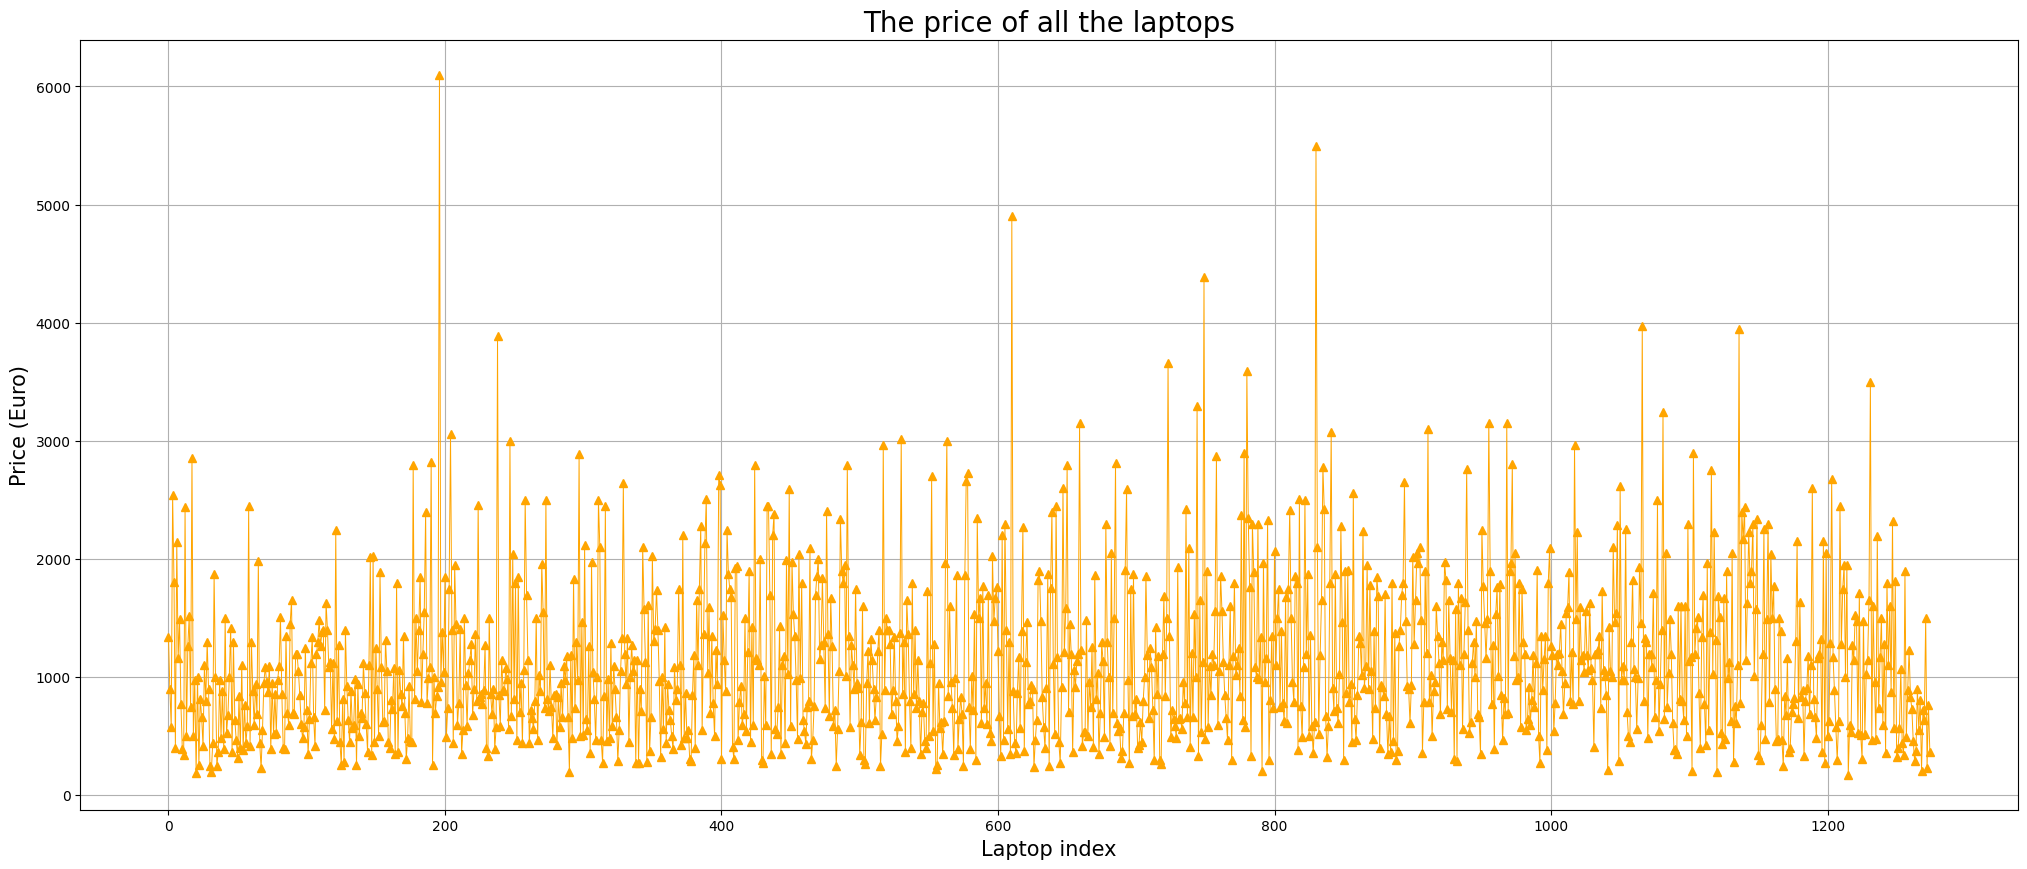

In [441]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the CSV file and storing it in the variable 'file'
file = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")

# Creating a figure with a specific size for the plot
plt.figure(figsize = (25,10))

'''when specify only file['Price (Euro)'], each index is automatically concatenated with its corresponding price at the file.
linewidth controls the thickness of the plot line, linestyle specifies a solid line,
marker specifies the marker type, and color sets the line color to orange'''
plt.plot(file['Price (Euro)'], linewidth=0.7, linestyle='-', marker='^', color='orange')

# Adding a title to the plot with a specific font size
plt.title('The price of all the laptops', fontsize=20)

# Adding a label to the x-axis with a specific font size
plt.xlabel('Laptop index', fontsize=15)

# Adding a label to the y-axis with a specific font size
plt.ylabel('Price (Euro)', fontsize=15)

# Prints squares on the screen.
plt.grid(True)

# Show the graph.
plt.show()

Average laptop price for each company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

Company with the most expensive laptops on average:
The highest avg price company: Razer 
The highest average price: 3346.14 Euro


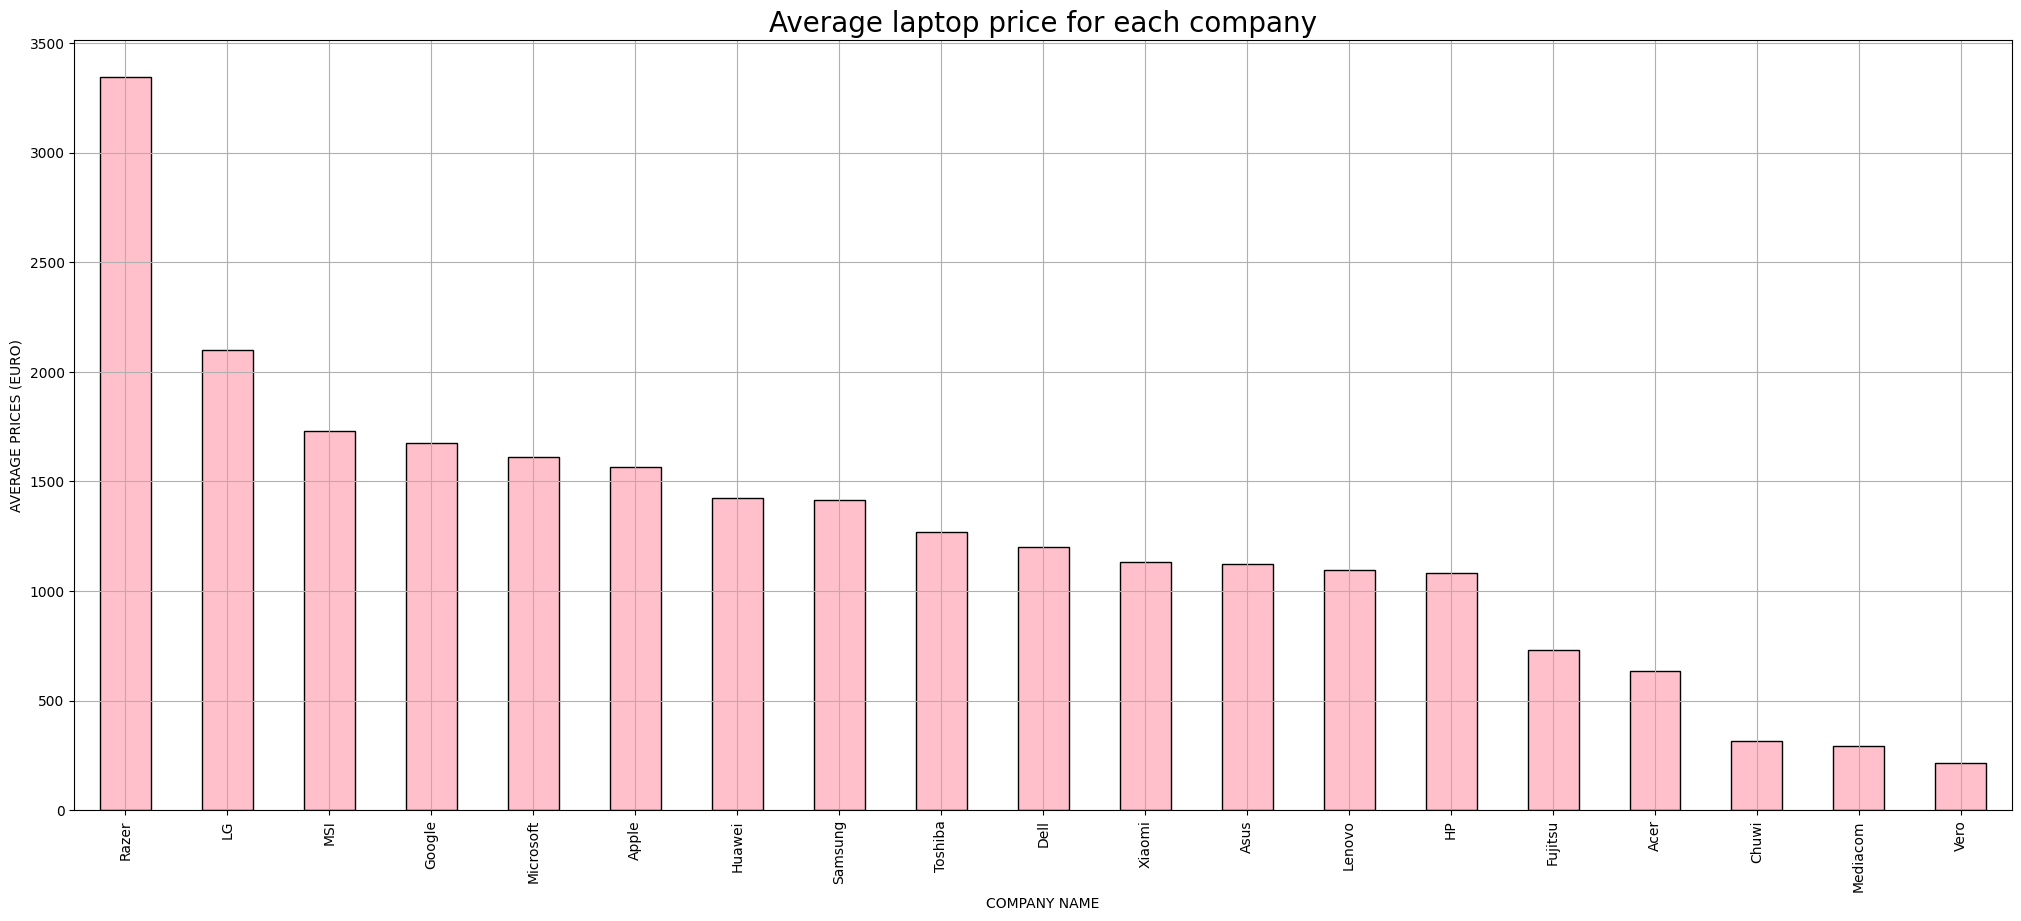

In [442]:
import pandas as pd  
import matplotlib.pyplot as plt  

# Reading the CSV file and storing it in the variable 'file'
file = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")

# groupby(): Groups data based on the 'Company' column
# mean(): Calculates the mean (average) for the 'Price (Euro)' column within each group
# sort_values(): Sorts the average prices in escending order (I want it in desending order- False)
company_avg_price = file.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)

# idxmax(): Returns the index (in this case, the company name) corresponding to the maximum value in the series
highest_avg_price_company = company_avg_price.idxmax()  

# max(): Returns the maximum value in the series (the highest average price)
highest_avg_price = company_avg_price.max()

# Prints information
print("Average laptop price for each company:") 
print(company_avg_price) 

# format(): Formats the string with placeholders for variables (e.g., company name and price) 
# {:.2f}: is a string formatting specifier that ensures the value is rounded with 2 decimal places
print("\nCompany with the most expensive laptops on average:")  
print("The highest avg price company: {} \nThe highest average price: {:.2f} Euro".format(highest_avg_price_company, highest_avg_price))

# figure(): Sets the figure size for the plot
plt.figure(figsize=(25, 10))  

# plot(): Creates a bar chart with the average prices
# kind='bar': Specifies the bar chart type
# color: Sets the color of the bars
# edgecolor: Defines the border color of the bars
company_avg_price.plot(kind='bar', color='pink', edgecolor='black')  

# Adding a title to the plot with a specific font size
plt.title('Average laptop price for each company', fontsize=20)

# Adds a label to the x-axis
plt.xlabel('COMPANY NAME')  

# Adds a label to the y-axis
plt.ylabel('AVERAGE PRICES (EURO)')  

# Prints squares on the screen.
plt.grid(True)  

# show the graph.
plt.show()  


In [443]:
import pandas as pd

# Define a function to map inconsistent OS names to uniform values
def mapping(os_name):
    # Convert to lowercase and remove leading/trailing spaces for consistency
    os_name = os_name.lower().strip()
    if 'windows' in os_name:
        return 'Windows'
    elif 'chrome' in os_name:
        return 'Chrome OS'
    elif 'linux' in os_name:
        return 'Linux'
    elif 'mac' in os_name:
        return 'MacOS'
    elif 'no os' in os_name:
        return 'No OS'
    elif 'android' in os_name:
        return 'Android'

# Reading the CSV file and storing it in the variable 'file'
file = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")

# Replace values in the 'OpSys' column based on the mapping
# This replaces the inconsistent OS names in the column with their uniform counterparts
file['OpSys'] = file['OpSys'].apply(mapping)

# Get the unique operating systems after cleaning
# 'unique()' retrieves all distinct values in the 'OpSys' column
# Make it a list
unique_os = file['OpSys'].unique().tolist()

# Print the unique operating systems after cleaning
print("\nUnique operating systems after cleaning:")
print(unique_os)



Unique operating systems after cleaning:
['MacOS', 'No OS', 'Windows', 'Linux', 'Android', 'Chrome OS']


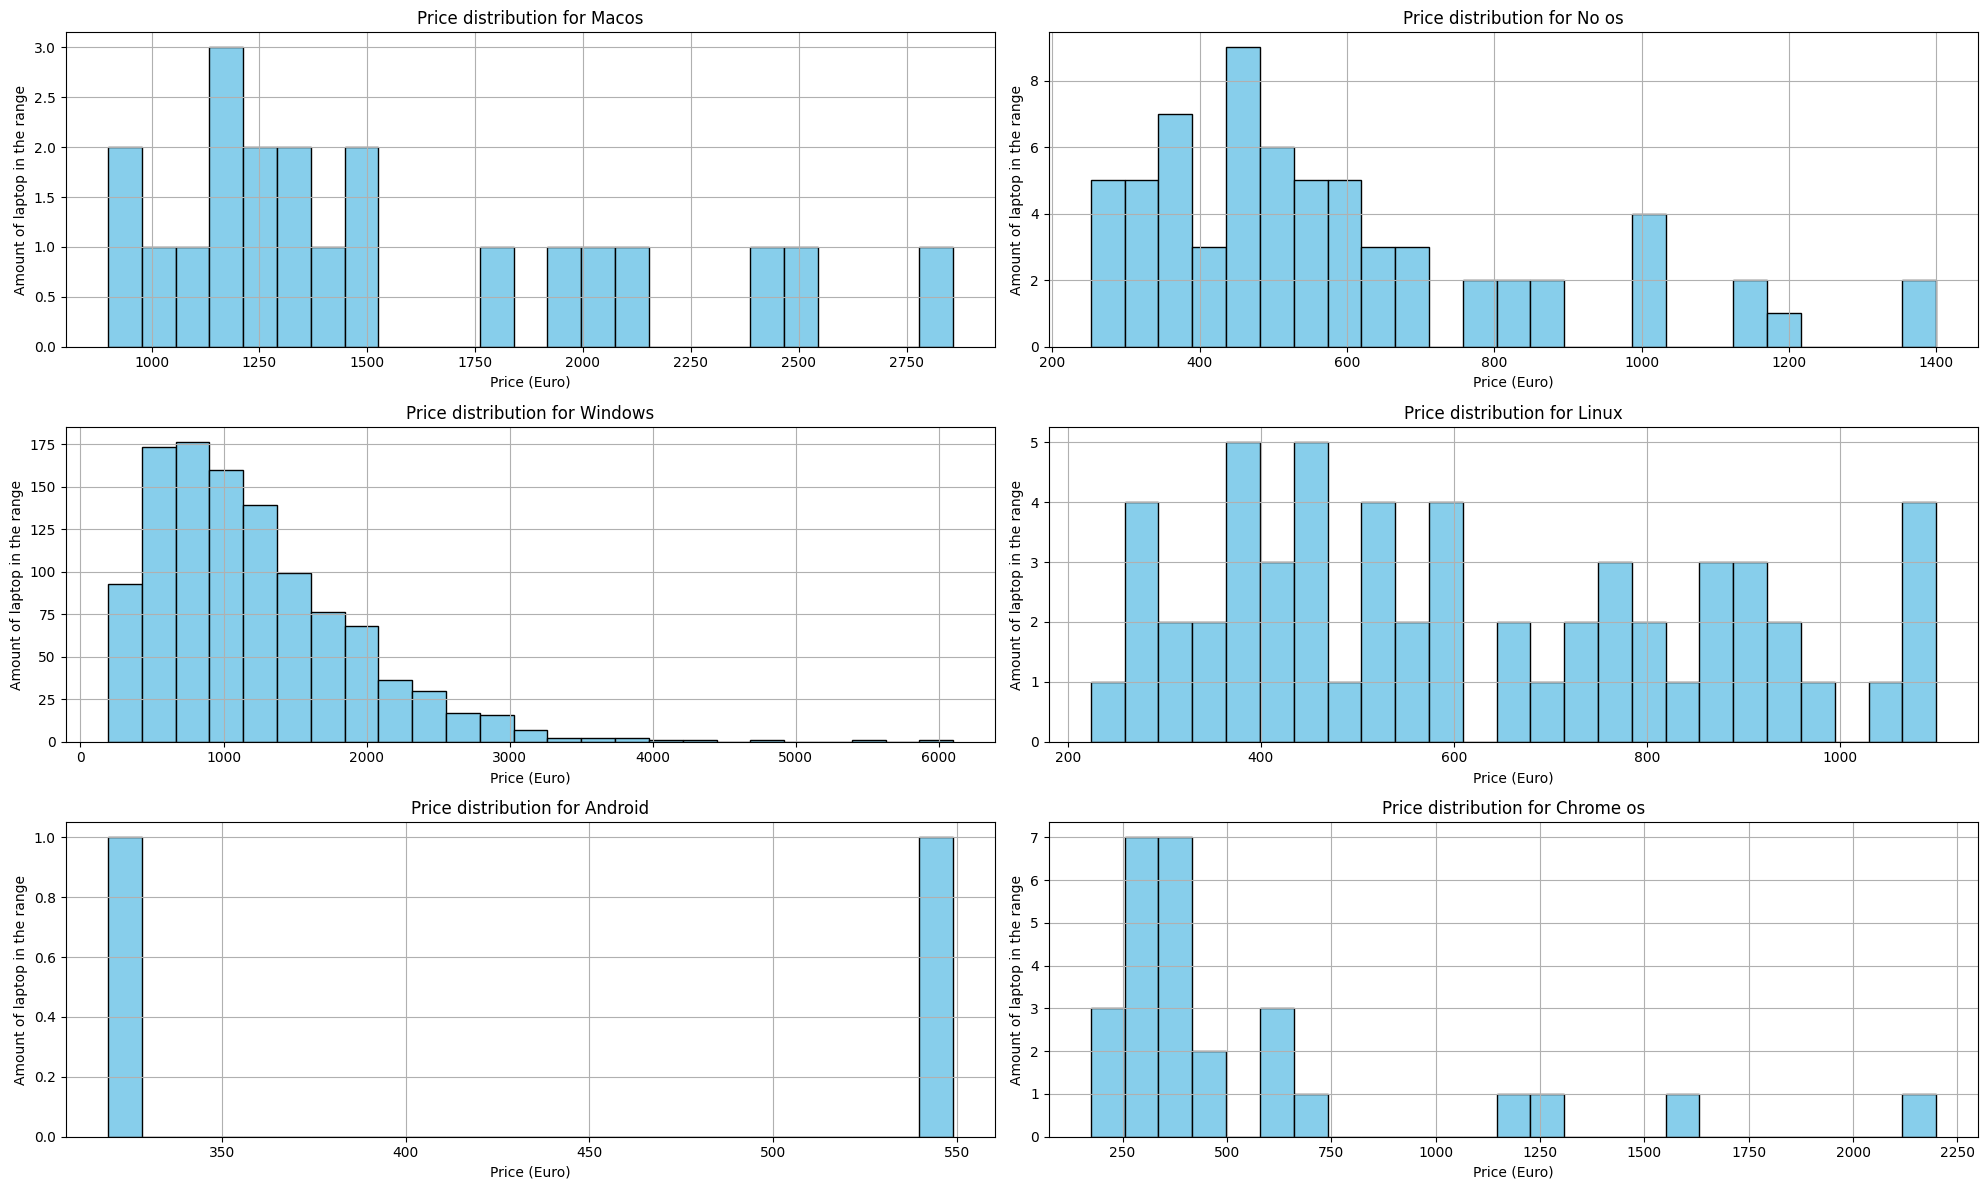

In [455]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the CSV file and storing it in the variable 'file'
file = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")

# Replace values in the 'OpSys' column based on the mapping
# This replaces the inconsistent OS names in the column with their uniform counterparts
file['OpSys'] = file['OpSys'].apply(mapping)

# Get the unique operating systems after cleaning
# 'unique()' retrieves all distinct values in the 'OpSys' column
# Make it a list
unique_os = file['OpSys'].unique().tolist()

# Create a figure with a larger size for better layout
plt.figure(figsize = (20,12))

# Loop over each unique operating system to create individual plots 
for i, os in enumerate (unique_os, start = 1):

    # Create subplot (3 rows, 2 columns), with i as the subplot number
    plt.subplot(3, 2, i )

    # Filter the dataframe for the current OS
    subset = file[file['OpSys']==os]

    # Create a histogram
    plt.hist(subset['Price (Euro)'], bins = 25, color = 'skyblue', edgecolor = "black")
    
    # Prints squares on the screen.
    plt.grid(True)

    # Dynamic set title with capitalized OS name
    plt.title(f"Price distribution for {os.capitalize()}")

    # Adds a label to the x-axis
    plt.xlabel('Price (Euro)')

    # Adds a label to the y-axis
    plt.ylabel('Amount of laptop in the range')

# Adjust layout to prevent overlap of plots
plt.tight_layout()

# show the graph.
plt.show()

Average price for each RAM size:
RAM (GB)
2      247.634375
4      576.109101
6      619.356571
8     1184.429413
12    1239.438400
16    1941.193081
24    2206.333333
32    3413.085882
64    3975.000000
Name: Price (Euro), dtype: float64


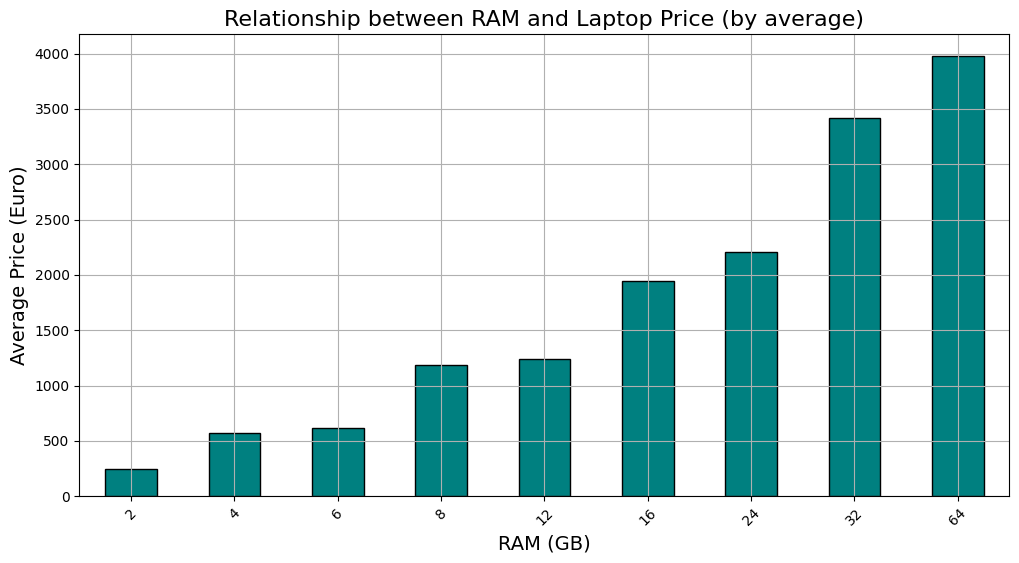

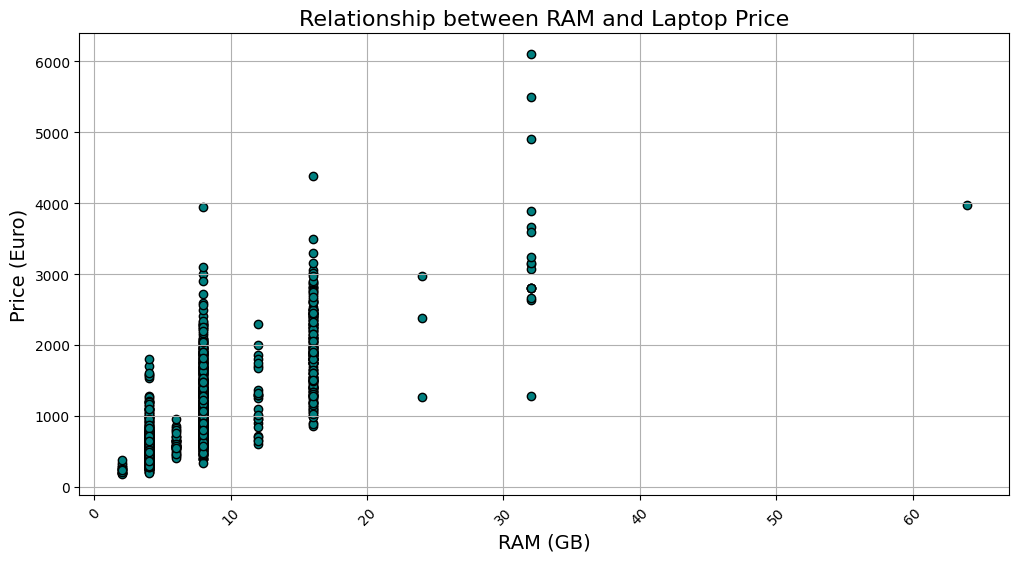

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading the CSV file and storing it in the variable 'file'
file = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")

# Grouping the data by RAM size and calculating the average price for each RAM size
ram_price_avg = file.groupby('RAM (GB)')['Price (Euro)'].mean() 

# Print the results for clarity
print("Average price for each RAM size:")  
print(ram_price_avg)

# Set the figure size for the plot.
plt.figure(figsize=(12, 6)) 

# Creating a bar plot to visualize the relationship between RAM and price (by average)
ram_price_avg.plot(kind='bar', color='teal', edgecolor='black')  

# Set the title of the plot.
plt.title('Relationship between RAM and Laptop Price (by average)', fontsize=16) 

# Adds a label to the x-axis
plt.xlabel('RAM (GB)', fontsize=14) 

# Rotates the labels of the x (the values ​​below the graph) at an angle of 45 degrees.
plt.xticks(rotation=45)

# Adds a label to the y-axis
plt.ylabel('Average Price (Euro)', fontsize=14)

# Prints squares on the screen.
plt.grid(True)

# show the graph.
plt.show()

# Scatter plot to show the relationship between RAM size and laptop price (another visualization- by regular price and not by average)
# Set the figure size for the scatter plot.
plt.figure(figsize = (12,6)) 

# Create a scatter plot.
plt.scatter(file['RAM (GB)'], file['Price (Euro)'], color = 'teal', edgecolors = 'black')  

# Set the title for the scatter plot.
plt.title('Relationship between RAM and Laptop Price', fontsize = 16) 

# Adds a label to the x-axis
plt.xlabel('RAM (GB)', fontsize = 14) 

# Rotates the labels of the x (the values ​​below the graph) at an angle of 45 degrees.
plt.xticks(rotation=45)

# Adds a label to the y-axis
plt.ylabel('Price (Euro)', fontsize = 14) 

# Prints squares on the screen.
plt.grid(True)

# show the graph.
plt.show()

# The bar chart shows a clear trend: as RAM size increases, the average price of laptops also increases.

In [456]:
import pandas as pd

# Reading the CSV file and storing it in the variable 'file'
file = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")

# Define a function to extract the storage types from the 'Memory' column
def extract_storage(memory):

    # This checks if the memory string contains a '+' character, indicating multiple storage types.
    # There are some memmories that has 2 storage type as 128GB SSD +  1TB HDD for example
    if '+' in memory:

        # Split by '+' to separate multiple storage types
        parts = memory.split('+')
    
        # Extract storage types from each part
        storage_types = []

        for part in parts:
            # Removes any extra spaces from the beginning or end of the string and splits the string into a list of words based on spaces.
            words = part.strip().split()
        
            # If more than 2 words, take the last 2 words
            if len(words) > 2:
                storage_types.append(' '.join(words[-2:]))
            else:
                # If 2 or fewer words, take the last word
                storage_types.append(words[-1])
                
    # Join the storage types with '+'
        return ' + '.join(storage_types)
      
    # This handles cases where there is no '+' character, extracting only the storage type(s).
    else:

        # Split the memory string based on spaces
        parts = memory.split()
        
        # In case there is no + in memory, one possibility would be to have 3 words in which I would like to take the last 2 words which represent the storge_type
        # Second possibility would be to have 2 words in which I would like to take the last word which represent the storge_type
        return ' '.join(parts[-2:]) if len(parts) > 2 else parts[-1]


# This line applies the 'extract_storage' function to every element in the 'Memory' column and stores the result in a new column named 'Storage type'.

# Apply the function to the 'Memory' column
# Create a new 'Storage type' column
file['Storage type'] = file['Memory'].apply(extract_storage)

print("The new column contains:\n", file['Storage type'].unique().tolist())

# Print the first 40 rows of the dataframe to check the new column (all different cases appear)
file.head(40)


The new column contains:
 ['SSD', 'Flash Storage', 'HDD', 'SSD + HDD', 'SSD + SSD', 'Hybrid', 'Flash Storage + HDD', 'HDD + HDD', 'SSD + Hybrid']


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.30,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.80,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.50,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.70,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.10,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,SSD
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD,A9-Series 9420,3.00,4,500GB HDD,AMD,Radeon R5,Windows 10,2.10,400.00,HDD
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.20,16,256GB Flash Storage,Intel,Iris Pro Graphics,Mac OS X,2.04,2139.97,Flash Storage
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.80,8,256GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,1158.70,Flash Storage
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel,Core i7 8550U,1.80,16,512GB SSD,Nvidia,GeForce MX150,Windows 10,1.30,1495.00,SSD
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel,Core i5 8250U,1.60,8,256GB SSD,Intel,UHD Graphics 620,Windows 10,1.60,770.00,SSD


In [ ]:
'''
1. What is the average price for laptops based on their storage type?
Suggested analysis: Group data by storage type, calculate the average price.
Visualization: Bar chart showing the average price for each storage type.

2.Is there a correlation between laptop weight and price?
Suggested analysis: Calculate the correlation between weight and price.
Visualization: Scatter plot with a trendline to visualize the relationship.

3. What is the relationship between screen size and price?
Suggested analysis: Calculate the correlation between screen size and price.
Visualization: Scatter plot with a trendline to show the relationship.

4.What is CPU Company's distribution in the market? 
Suggested analysis: Calculate usage percentages for each CPU Company separately from the total usage. 
Visualization: Pie diagram, show distribution of CPU Company usage.

5.what is the distribution of companies among diffrent OS? which company is the most popular in each OS?
Suggested analysis: the distribution of companies across different operating systems (OS). Identify the most popular company for each OS.
Visualization: Use bar plots for visualization to display the distribution for each OS.

Selected Questions for Implementation:
What is the average price for laptops based on their storage type?
what is the distribution of companies among diffrent OS? wich company is the most popular in each OS?'''

"\n1. What is the average price for laptops based on their storage type?\nSuggested analysis: Group data by storage type, calculate the average price.\nVisualization: Bar chart showing the average price for each storage type.\n\n2.Is there a correlation between laptop weight and price?\nSuggested analysis: Calculate the correlation between weight and price.\nVisualization: Scatter plot with a trendline to visualize the relationship.\n\n3. What is the relationship between screen size and price?\nSuggested analysis: Calculate the correlation between screen size and price.\nVisualization: Scatter plot with a trendline to show the relationship.\n\n4.What is CPU Company's distribution in the market? \nSuggested analysis: Calculate usage percentages for each CPU Company separately from the total usage. \nVisualization: Pie diagram, show distribution of CPU Company usage.\n\n5.what is the distribution of companies among diffrent OS? wich company is the most popular in each OS?\nSuggested anal

Average price for each Storage type:
Storage type
SSD + Hybrid           2994.995000
Flash Storage + HDD    1993.000000
SSD + HDD              1613.456450
SSD + SSD              1420.990000
SSD                    1316.405975
Hybrid                  875.935000
HDD                     658.504441
HDD + HDD               621.450000
Flash Storage           524.308857
Name: Price (Euro), dtype: float64


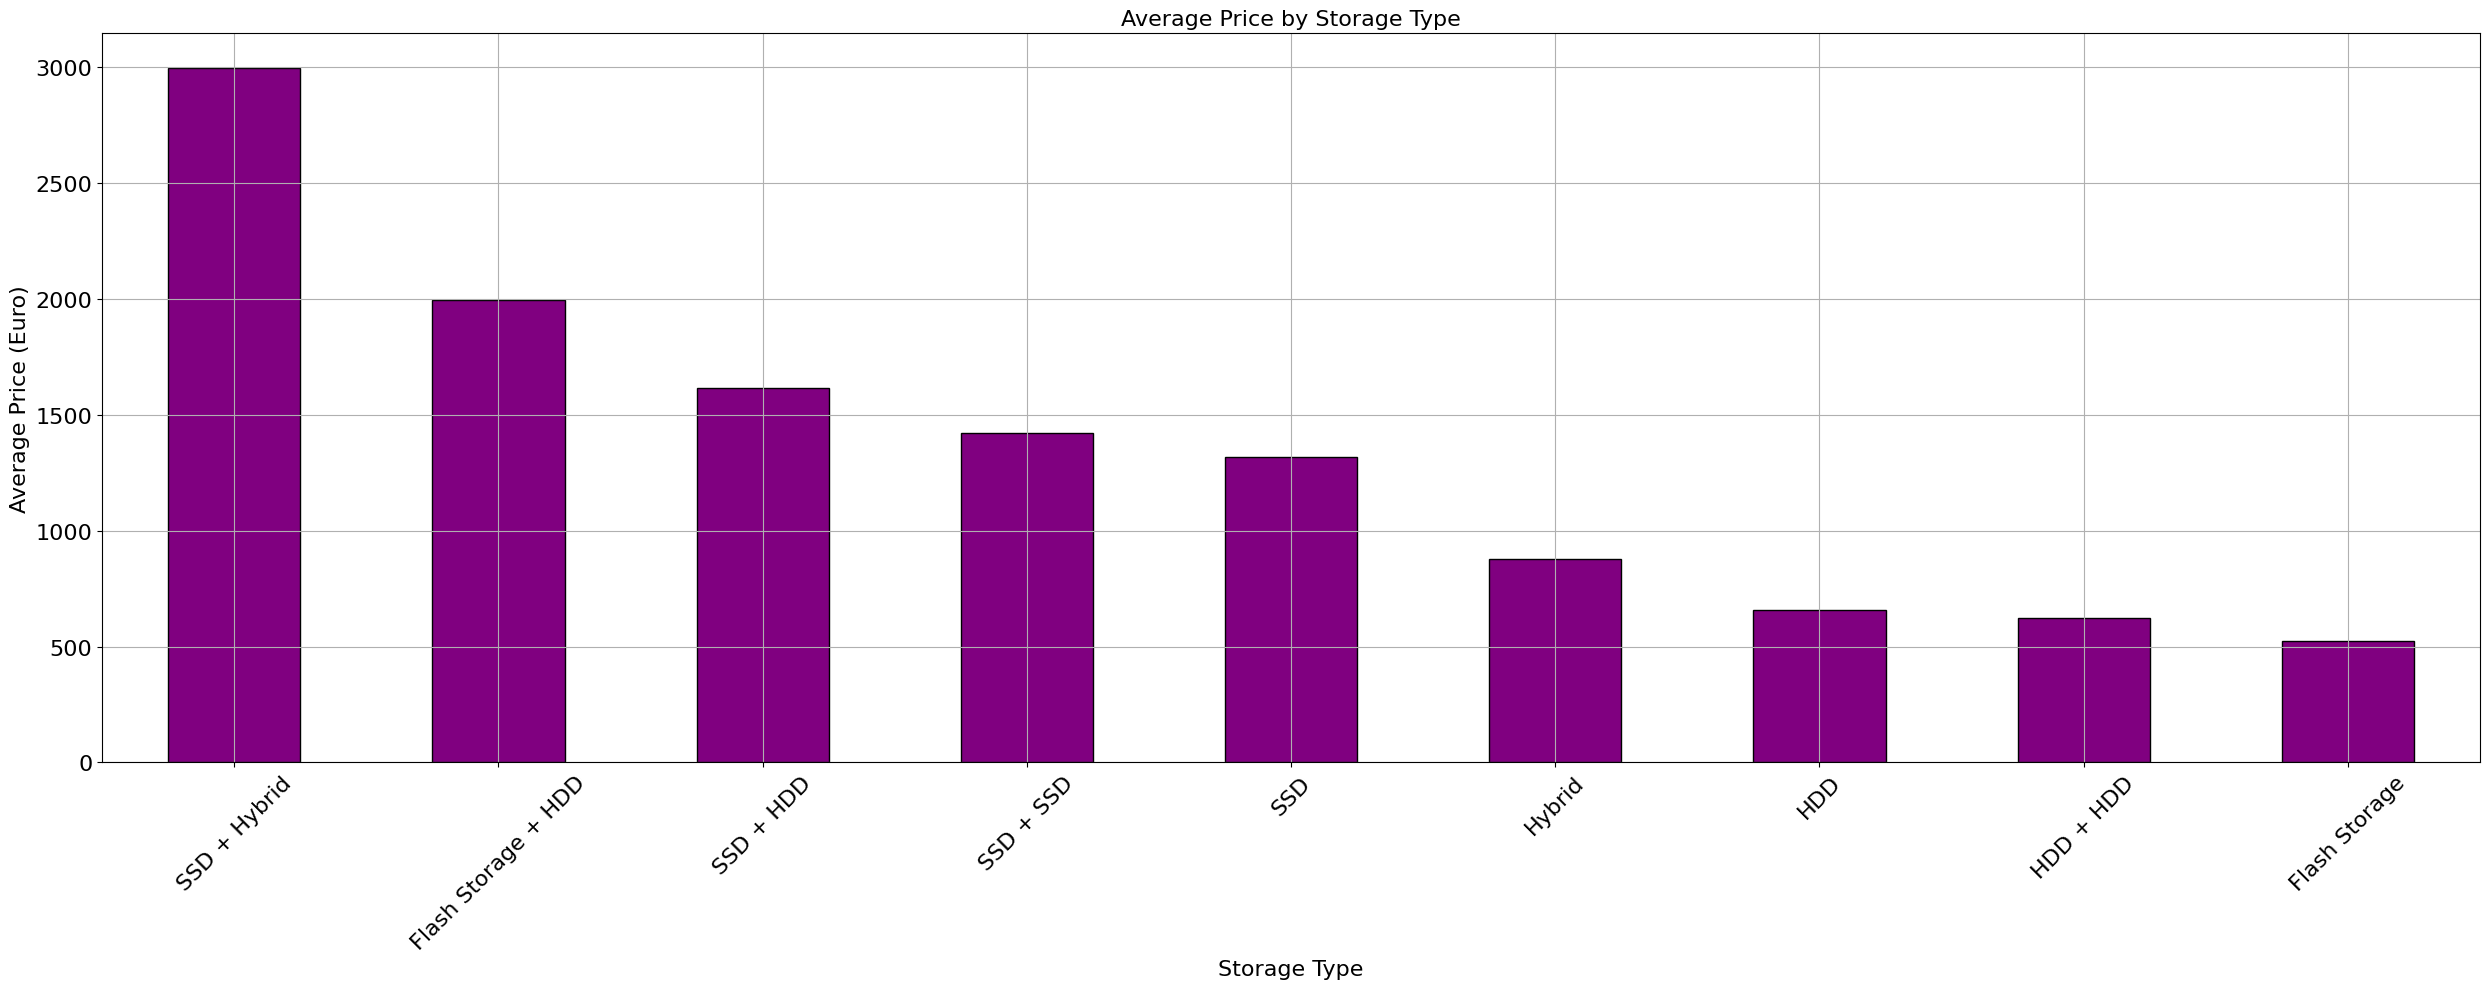

In [448]:
### Question 1: Average price by storage type
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# Reading the CSV file and storing it in the variable 'file'
file = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")

file['Storage type'] = file['Memory'].apply(extract_storage)

# groupby(): Groups data based on the 'Company' column
# mean(): Calculates the mean (average) for the 'Price (Euro)' column within each group
# sort_values(): Sorts the average prices in escending order (I want it in desending order- False)
avg_price_by_storage = file.groupby('Storage type')['Price (Euro)'].mean().sort_values(ascending=False)

# Print the results for clarity
print("Average price for each Storage type:")  
print(avg_price_by_storage)

# Visualization:
# Set the figure size for the scatter plot.
plt.figure(figsize=(25, 10))

# Creating a bar plot to visualize the relationship between RAM and price (by average)
avg_price_by_storage.plot(kind='bar', color='purple', edgecolor='black') 

# Set the title for the scatter plot.
plt.title("Average Price by Storage Type", fontsize=16)

# Adds a label to the x-axis
plt.xlabel("Storage Type", fontsize=16)

# Adds a label to the y-axis
plt.ylabel("Average Price (Euro)", fontsize=16)

# Rotates the labels of the x (the values ​​below the graph) at an angle of 45 degrees.
plt.xticks(rotation=45, fontsize=16)

# Increase the font size of the numbers (y-axis tick labels)
plt.yticks(fontsize=16)

# Automatically adjusts the spacing between the different elements of the graph to avoid overlaps.
plt.tight_layout()

# Prints squares on the screen.
plt.grid(True)

# show the graph.
plt.show()


In [449]:
'''Performance and Price Correlation:
There is a clear correlation between storage type and price.
Higher-performing storage types, such as SSD and combinations like SSD + Hybrid or SSD + HDD, tend to have higher prices.

Budget vs. Premium:
The type of storage directly affects the pricing tier of laptops.
Laptops with HDD storage are significantly cheaper, making them accessible to budget-conscious consumers.
In contrast, configurations with SSD, particularly when combined with other storage types or higher capacities, command a premium price.'''

'Performance and Price Correlation:\nThere is a clear correlation between storage type and price.\nHigher-performing storage types, such as SSD and combinations like SSD + Hybrid or SSD + HDD, tend to have higher prices.\n\nBudget vs. Premium:\nThe type of storage directly affects the pricing tier of laptops.\nLaptops with HDD storage are significantly cheaper, making them accessible to budget-conscious consumers.\nIn contrast, configurations with SSD, particularly when combined with other storage types or higher capacities, command a premium price.'

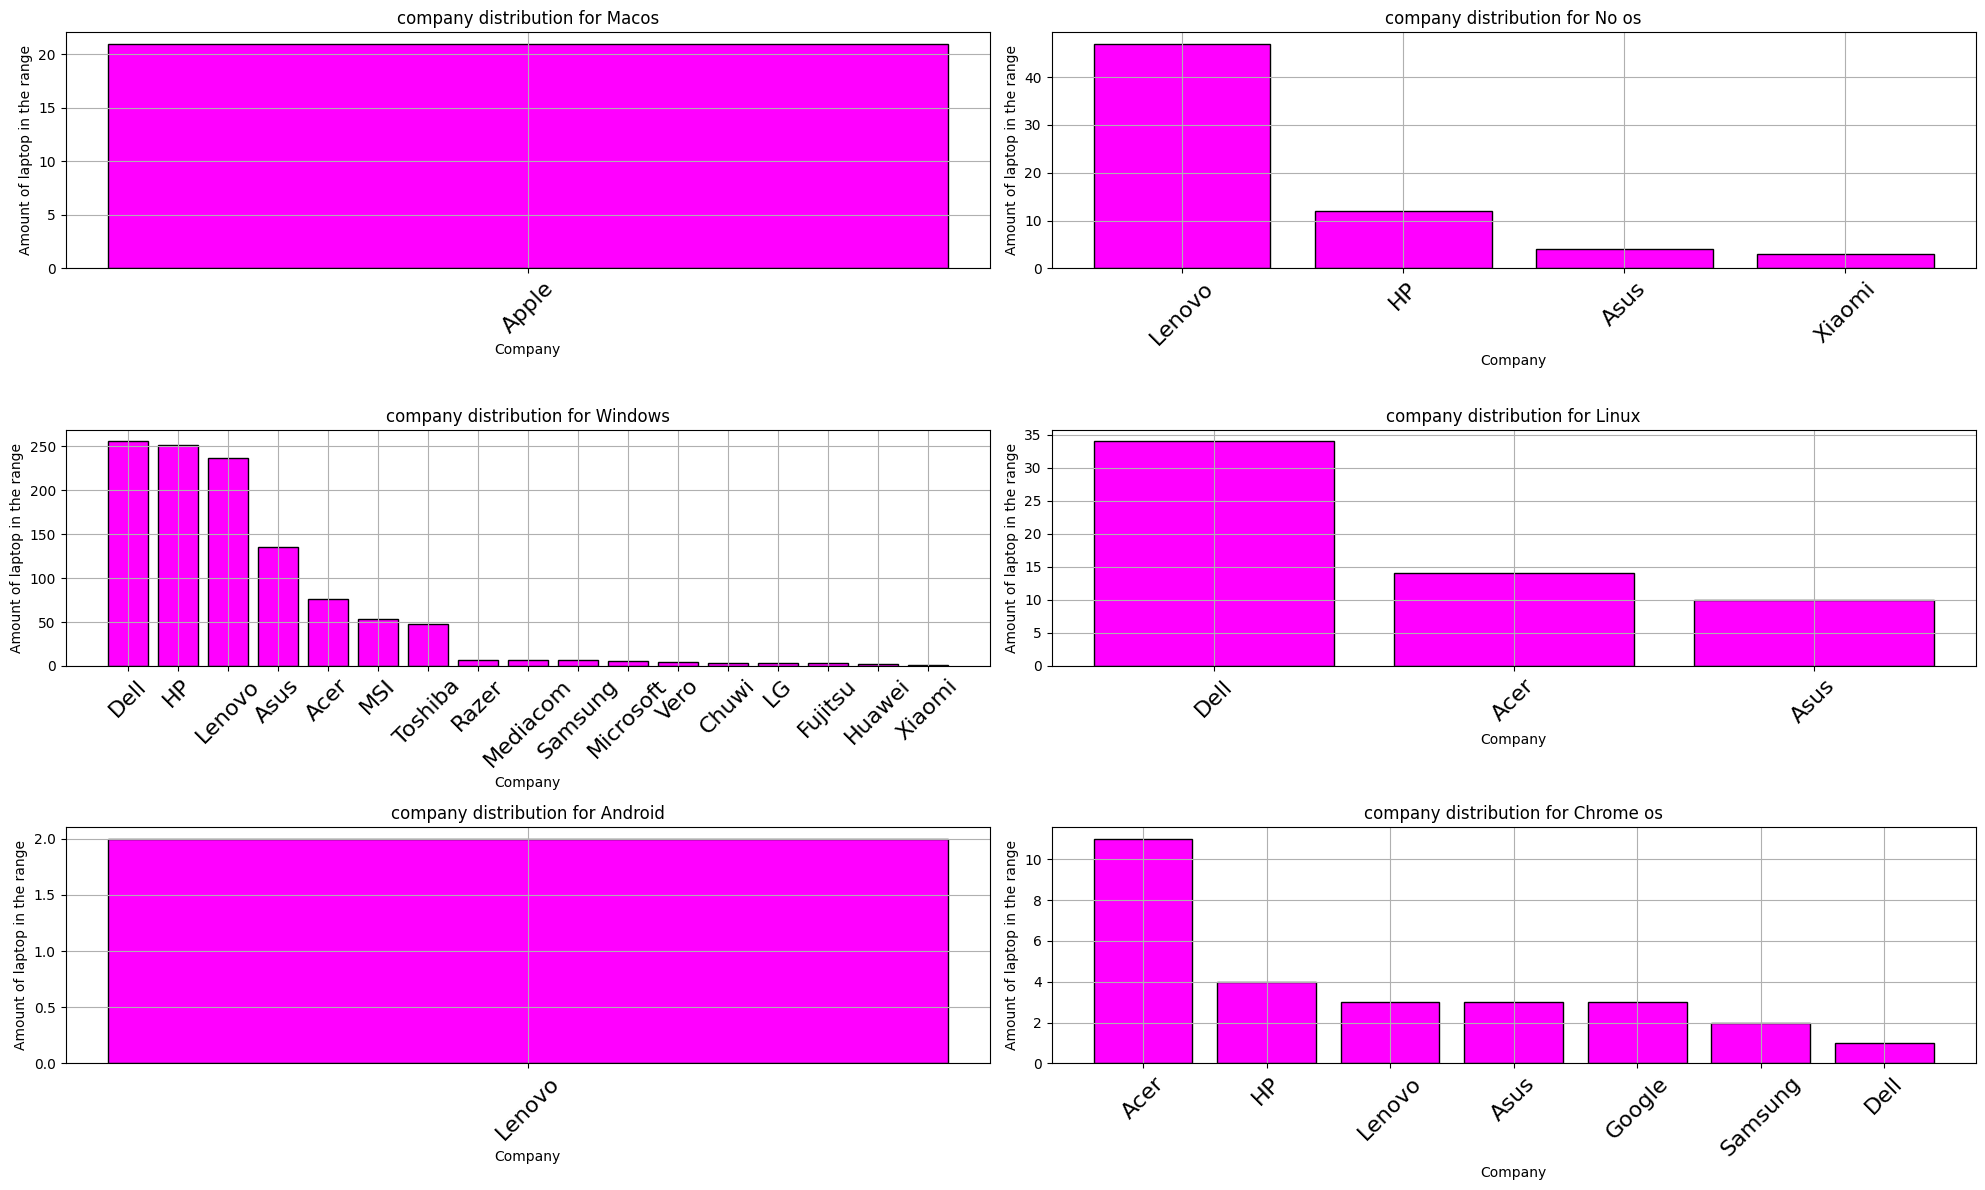

In [457]:
### Question 5: what is the distribution of companies among diffrent OS? wich company is the most popular in each OS?

import pandas as pd
import matplotlib.pyplot as plt

# Reading the CSV file and storing it in the variable 'file'
file = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")

# Replace values in the 'OpSys' column based on the mapping
# This replaces the inconsistent OS names in the column with their uniform counterparts
file['OpSys'] = file['OpSys'].apply(mapping)

# Get the unique operating systems after cleaning
# 'unique()' retrieves all distinct values in the 'OpSys' column
# Make it a list
unique_os = file['OpSys'].unique().tolist()

# Create a figure with a larger size for better layout
plt.figure(figsize = (20,12))

# Loop over each unique operating system to create individual plots 
for i, os in enumerate (unique_os, start = 1):

    # Create subplot (3 rows, 2 columns), with i as the subplot number
    plt.subplot(3, 2, i )

    # Filter the dataframe for the current OS
    subset = file[file['OpSys']==os]

    '''subset['Company']: Extracts the Company column from the DataFrame subset.
    .value_counts(): Counts the occurrences of each unique value in that column and returns a Series where:
    The index contains the unique values (e.g., company names).
    The values represent the frequency of each unique value.'''
    count =subset['Company'].value_counts()

    #Draws a bar chart where
    plt.bar(count.index, count.values, color = 'magenta', edgecolor = "black")
    
    # Prints squares on the screen.
    plt.grid(True)

    # Dynamic set title with capitalized OS name
    plt.title(f"company distribution for {os.capitalize()}")

    # Adds a label to the x-axis
    plt.xlabel('Company')

    # Rotates the labels of the x (the values ​​below the graph) at an angle of 45 degrees.
    plt.xticks(rotation=45, fontsize=16)

    # Adds a label to the y-axis
    plt.ylabel('Amount of laptop in the range')

# Adjust layout to prevent overlap of plots
plt.tight_layout()

# show the graph.
plt.show()


In [451]:
'''The graphs show the distribution of laptop manufacturers (companies) across different operating systems (OS).
Based on the visualized data, we can derive the following observations and insights:
MacOS- 
Observation: Apple is the sole company manufacturing laptops with MacOS.
Conclusion: This result is expected since Apple exclusively uses MacOS for its devices.
No OS- 
Observation: Lenovo is the most dominant company in this category, followed by HP. Asus and Xiaomi have a much smaller share.
Conclusion: Lenovo leads the market for laptops sold without any operating system, which might appeal to developers or users who prefer to install their own OS.
Windows-
Observation: Dell, HP, and Lenovo are the top three manufacturers, with nearly equal numbers. Other companies like Asus, Acer, and MSI follow, while smaller brands contribute insignificantly.
Conclusion: Windows laptops dominate the market and are produced by a wide range of companies, with Dell and HP being the most popular.
Linux-
Observation: Dell is the most popular company offering Linux laptops, followed by Acer and Asus.
Conclusion: Dell shows a strong presence in the Linux market, potentially targeting developers and technical users.
Android-
Observation: Dell is the most popular company offering Linux laptops, followed by Acer and Asus.
Conclusion: Dell shows a strong presence in the Linux market, potentially targeting developers and technical users.
Chrome OS-
Observation: Acer leads this category, followed by HP, Lenovo, Asus, Google, Samsung, and Dell, in that order.
Conclusion: Acer dominates the Chromebook market, which focuses on lightweight, browser-centric laptops.'''

'The graphs show the distribution of laptop manufacturers (companies) across different operating systems (OS).\nBased on the visualized data, we can derive the following observations and insights:\nMacOS- \nObservation: Apple is the sole company manufacturing laptops with MacOS.\nConclusion: This result is expected since Apple exclusively uses MacOS for its devices.\nNo OS- \nObservation: Lenovo is the most dominant company in this category, followed by HP. Asus and Xiaomi have a much smaller share.\nConclusion: Lenovo leads the market for laptops sold without any operating system, which might appeal to developers or users who prefer to install their own OS.\nWindows-\nObservation: Dell, HP, and Lenovo are the top three manufacturers, with nearly equal numbers. Other companies like Asus, Acer, and MSI follow, while smaller brands contribute insignificantly.\nConclusion: Windows laptops dominate the market and are produced by a wide range of companies, with Dell and HP being the most po